# Project : Wrangle and Analyse Data

## Summary

<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#loading_libs">Load Libraries</a></li>
<li><a href="#data_gathering">Data gathering</a>
    <ul>
        <li><a href="#gather_archive">Twitter Archive</a></li>
        <li><a href="#gather_predictions">Image Predictions</a></li>
        <li><a href="#gather_api">API Data</a></li>
    </ul>
</li>
<li><a href="#assessing">Data Assessing</a>
    <ul>
        <li><a href="#assess_archive">Archive table</a></li>
        <li><a href="#assess_predictions">Predictions table</a></li>
        <li><a href="#assess_api">Api table</a></li>
        <li><a href="#assess_summary">Assessing summary</a></li>
    </ul>
</li>
<li><a href="#cleaning">Data cleaning</a>
    <ul>
        <li><a href='#clean_missing_data'>Missing data</a></li>
        <li><a href='#clean_tidiness'>Tidiness</a></li>
        <li><a href='#clean_quality'>Quality</a></li>
        <li><a href='#clean_conclusion'>Conclusion</a></li>
    </ul>
</li>
<li><a href="#save_data">Save wrangled data</a></li>
<li><a href="#analysis_visualization">Analysis & Visualization</a>
    <ul>
        <li><a href='#infl_rating'>Influence of rating over retweet and favorite counts</a></li>
        <li><a href='#fav_dog_type'>Favorite dog type</a></li>
        <li><a href='#fav_dog_breed'>Favorite dog breed</a></li>
        <li><a href='#user_inter_time'>User interaction over time</a></li>
    </ul>
</li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='introduction'> </a>
## Introduction

In this project, I'll be analysing the weRateDogs twitter account's tweets, in order to find answers to the following questions:
-	What dog type do the users prefer?
-	Does the given rating influence user interaction (retweets and favorites)?
-	How does user interaction change over time?
-	What breed of dogs do the users prefer?

but before that, Some data wrangling might be necessary to extract relevant data for this purpose.

<a id='loading_libs'> </a>

## 1. Load libraries

In [97]:

# To ignore matplotlib warnings
import warnings
warnings.filterwarnings("ignore", module="matplotlib")


import pandas as pd
import numpy as np
import requests
import os
import tweepy
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re


%matplotlib inline

<a id='data_gathering'> </a>

## 2. Data Gathering

<a id='gather_archive'> </a>
### 2.1 Twitter archive

In [2]:
#1-- Twitter Archive

# Opening the twitter archive file directly using pandas' read_csv method
archive_df = pd.read_csv("twitter-archive-enhanced.csv")

<a id='gather_predictions'> </a>
### 2.2 Image predictions


In [99]:
# Programatically download the image prediction file via the request library

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# write the downloaded data to file
with open("image-predictions.tsv", mode="wb") as file:
    file.write(response.content)

In [100]:
# read the prediction data to a pandas dataframe
prediction_df = pd.read_csv("image-predictions.tsv", sep='\t')

<a id='gather_api'> </a>
### 2.3 Api data

In [ ]:
# 3
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:

with open("tweet_json.txt") as file:
    rows = file.readlines()
    rows_json = []

    for row in rows:
        # get row in json
        row_json = json.loads(row)
        
        # append json object
        rows_json.append({
            "tweet_id": row_json["id"],
            "retweet_count": row_json["retweet_count"],
            "favorite_count": row_json["favorite_count"]
        })
        
api_df = pd.DataFrame(rows_json, columns = ['tweet_id', 
                                            'retweet_count', 
                                            'favorite_count'])


<a id='assessing'> </a>

## 3. Data Assessing

<a id='assess_archive'> </a>

### 3.1. Archive table

In [7]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


1. Missing values for columns: doggo, floofer, pupper, puppo
2. None instead of Nan in columns: doggo, floofer, pupper, puppo
3. Those 4 columns represent the same type of information (dog type)


In [8]:
archive_df[["doggo", "floofer", "pupper", "puppo"]].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,2259.0,2346.0,2099.0,2326.0
doggo,97.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,257.0,NaN
puppo,NaN,NaN,NaN,30.0


In [9]:
print("Number of dog types provided : {}".format(97 + 10 + 257 + 30 ))

Number of dog types provided : 394


In [10]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

4. There are 181 retweets (which should not be included in the dataset).
5. There are columns which I do not plan to use in my analysis:
    - in_reply_to_status_id, in_reply_to_user_id
    - expanded_urls
    - name
    - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp (once retweets are dealt with these columns will be unnecessary)
6. Erroneous datatype in columns: tweet_id, timestamp, (doggo, floofer, pupper, and puppo) which will be represented in 1 column(dogtype).


In [11]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

7. Source is given as a html anchor tag which is not necessary since there are only 4 different values, which can be labeled:
    - iPhone
    - Vine
    - web client
    - TweetDeck

In [12]:
archive_df[['rating_denominator','rating_numerator']].describe()

,rating_denominator,rating_numerator
count,2356.000000,2356.000000
mean,10.455433,13.126486
std,6.745237,45.876648
min,0.000000,0.000000
25%,10.000000,10.000000
50%,10.000000,11.000000
75%,10.000000,12.000000
max,170.000000,1776.000000


8. rating_denominator and rating_numerator have outliers.
9. rating_denominator and rating_numerator represent 2 parts of the information 'dog rating'.

<a id='assess_predictions'> </a>

### 3.2.  Predictions table

In [13]:
prediction_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


10. The last 9 columns represent the same group of information(prediction, confidence, isDog)

In [14]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


10. Since there are 2075 rows in predictions table and 2356 rows in the archive table, there must be missing images for some tweets
11. Erroneous datatype for column: tweet_id

In [15]:
prediction_df.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


12. According to the neural networks classifications, some images are very unlikely to be dog images.

<a id='assess_api'> </a>
### 3.3. API data

In [16]:
api_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [17]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


13. Erroneous datatype for column: tweet_id.
14. This table has complementary data to Archive table.

15. Missing 2 records of retweet_count and favorite_count (2354 instead of 2356 rows)

<a id='assess_summary'> </a>

### Assessement Summary

#### Quality:

##### Archive table:

- Missing values for columns: doggo, floofer, pupper, puppo
- None instead of Nan in columns name, doggo, floofer, pupper and puppo
- There are 181 retweets (which should not be included in the dataset).
- There are columns which I do not plan to use in my analysis:
    - in_reply_to_status_id, in_reply_to_user_id
    - expanded_urls
    - name
    - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp (once retweets are dealt with these columns will be unnecessary)
- Erroneous datatype in columns: tweet_id, timestamp, (doggo, floofer, pupper, and puppo) which will be represented in 1 column(dogtype).
- Source is given as a html anchor tag which is not necessary since there are only 4 different values, which can be labeled:
    - iPhone
    - Vine
    - web client
    - TweetDeck
- rating_denominator and rating_numerator have outliers.

##### Prediction table:

- Since there are 2075 rows in predictions table and 2356 rows in the archive table, there must be missing images for some tweets
- Erroneous datatype for column: tweet_id.
- According to the neural networks classifications, some images are very unlikely to be dog images.

##### Api table:
- Erroneous datatype for column: tweet_id.
- Missing 2 records of retweet_count and favorite_count (2354 instead of 2356 rows)

#### Tidiness:

##### Archive table:

- Those 4 columns (doggo, floofer, pupper, puppo) represent the same type of information (dog type)
- rating_denominator and rating_numerator represent the 2 components for rating a dog

##### Prediction table:
- The last 9 columns prediction table represent the same group of information(prediction, confidence, isDog)

##### api table:
- This table has complementary data to Archive table.

***
<a id='cleaning'> </a>

## 4. Cleaning

In [18]:
# make copies to conserve the original data
archive_clean = archive_df.copy()
prediction_clean = prediction_df.copy()
api_clean = api_df.copy()

<a id='clean_missing_data'> </a>
### 4.1. Missing data

#### All issues:

- Missing values for columns: doggo, floofer, pupper, puppo.
- None instead of Nan in columns name, doggo, floofer, pupper and puppo.
- Since there are 2075 rows in predictions table and 2356 rows in the archive table, there must be missing images for some tweets
- Missing 2 records of retweet_count and favorite_count (2354 instead of 2356 rows).

***
#### Issue:

- None instead of Nan in columns doggo, floofer, pupper, puppo.
- Missing values for columns: doggo, floofer, pupper, puppo.

These 2 issues will be dealt with at the same time

#### Define
- use the contains and replace methods to extract dogtypes from the text column 
- replace the dogtype columns with the respective ones extracted from the text column

#### Code

In [19]:
def corrected_dogtype_column(df, dogtype):
    """This function extracts dog types from the text column and returns them as a column """
    return archive_clean.text.str.contains(dogtype, case= False).replace(True, dogtype).replace(False, np.nan)

In [20]:
dog_types = ["doggo", "floofer", "pupper", "puppo"]

# correct each dogtype column on it's own
for dog_type in dog_types:
    archive_clean[dog_type] = corrected_dogtype_column(archive_clean, dog_type)
    

#### Test

In [21]:
# Get number of None values  for each dogtype
none_sum = 0
for dog_type in dog_types:
    none_sum += (archive_clean[dog_type] == 'None').sum()
#
# This should be zero
print ("number of Nones: {}".format(none_sum))

## test number of values ...
archive_clean[["doggo", "floofer", "pupper", "puppo"]].apply(pd.Series.value_counts)

number of Nones: 0


,doggo,floofer,pupper,puppo
doggo,107.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,283.0,NaN
puppo,NaN,NaN,NaN,38.0


In [22]:
print("Number of dog types provided : {}".format(107 + 10 + 283 + 38 ))


Number of dog types provided : 438


438 - 394 = 44 dog type instances were extracted from the text column

***
#### Issue
Since there are 2075 rows in predictions table and 2356 rows in the archive table, there must be missing images for some tweets

#### Define

- create a masc for the archive tweet_ids  that are in prediction tweet_ids
- use the masc to select tweet_ids from archive

#### Code


In [23]:
tweet_with_img = archive_clean.tweet_id.isin( prediction_clean.tweet_id)
archive_clean = archive_clean[tweet_with_img]

#### Test

In [24]:
# This should be zero
(archive_clean.tweet_id.isin(prediction_clean.tweet_id) == False ).sum()

0

Ressource 

- [ pandas isin ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)

***
#### Issue

- Missing 2 records of retweet_count and favorite_count (2354 instead of 2356 rows).

#### Define
- create a masc for the archive tweet_ids  that are in api tweet_ids
- use the masc to select tweet_ids from archive

#### Code

In [25]:
tweet_with_recs = archive_clean.tweet_id.isin( api_clean.tweet_id)
archive_clean = archive_clean[tweet_with_recs]

#### Test

In [26]:
# This should be zero
(archive_clean.tweet_id.isin(api_clean.tweet_id) == False ).sum()

0

<a id='clean_tidiness'> </a>
### 4.2. Tidiness

##### Archive table:

- Those 4 columns ("doggo", "floofer", "pupper", "puppo") represent the same type of information (dog type)
- rating_denominator and rating_numerator represent the 2 components for rating a dog

##### Prediction table:
- The last 9 columns prediction table  represent the same type of information(prediction, confidence, isDog)

##### api table:
- This table (api table) has complementary data to Archive table.

***
#### Issue

- Those 4 columns ("doggo", "floofer", "pupper", "puppo") represent the same type of information (dog type)

#### Define
- write a function that merges a list of values
    - if all values are nan : returns nan
    - else join non nan values
- loop through the dataset rows and create a list of merged values of the concerned columns (using the function above)
- create a new column in the dataset using this new list
- drop the 4 columns

#### Code

In [27]:
def merge_values(vals):
    
    """This function merges a list of values,
        if all values a NaN => returns Nan
        else joins the non Nan values
    """
    s = pd.Series(vals)
    
    if (s.isnull().all()):
        return np.nan
    
    return ", ".join(s.dropna())

In [28]:
def merge_columns_values(df):
    
    """This function loops through the df rows and merges the values of 
    the 4 dogtype columns"""
    
    types = []
    for index, row in df.iterrows():
        types.append(merge_values([row["doggo"], row["floofer"], row["pupper"], row["puppo"]]))
    
    return types

In [29]:
archive_clean["dogtype"] = merge_columns_values(archive_clean)
archive_clean.drop(columns=["doggo", "floofer", "pupper", "puppo"], inplace = True)

#### Test

In [30]:
archive_clean[ "dogtype"].sample(10)

1232    NaN
805     NaN
1841    NaN
1408    NaN
2334    NaN
1737    NaN
1468    NaN
1665    NaN
969     NaN
2019    NaN
Name: dogtype, dtype: object

In [31]:
archive_clean[ "dogtype"].value_counts()

pupper            235
doggo              72
puppo              28
doggo, pupper      11
floofer             7
doggo, puppo        2
doggo, floofer      1
Name: dogtype, dtype: int64

In [32]:
print("Number of dog types provided : {}".format(236 + 72 + 28 + 11 + 7 + 2 + 1 ))

Number of dog types provided : 357


- It appears that some values were lost, and that's because of the rows that were dropped when dealing with tweets that have no images in the prediction table (2356 - 2075 = 281 rows were dropped)    
- Some dogs have 2 types, ex: doggo/pupper

***
#### Issue
- rating_denominator and rating_numerator represent the 2 components for rating a dog, they should be transformed into 1 column: rating

#### Define
- create a new column 'ratings' which will be calculated as rating_numerator/rating_denominator.
- drop rating_denominator and rating_numerator. (will be done later, when droping useless columns)

#### Code

In [33]:
archive_clean['ratings'] = archive_clean.rating_numerator / archive_clean.rating_denominator

#### Test

In [34]:
archive_clean.ratings.sample(5)

469     1.2
760     1.3
1378    0.9
324     1.2
13      1.2
Name: ratings, dtype: float64

In [35]:
archive_clean.ratings.describe()

count    2073.000000
mean        1.169987
std         3.988880
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: ratings, dtype: float64

- We notice once again the presence of outliers in the ratings column, this is due to the outliers in rating_numerator and rating_denominator

***
#### Issue 

- This table (api) has complementary data to Archive table.

#### Define

- use pandas 'merge' method to merge the archive table and api table on tweet_id

#### Code

In [36]:
archive_clean = pd.merge(left=archive_clean, right=api_clean, how='left', on='tweet_id')

In [37]:
archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogtype,ratings,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,1.3,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1.3,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,1.2,4328,25461


In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 17 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
dogtype                       356 non-null object
ratings                       2073 non-null float64
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
dtypes: float64(5), int64(5), object(

***
#### Issue 

- The last 9 columns in prediction table represent the same type of information(prediction, confidence, isDog)

#### Define
- rename the columns so that you can use pandas' wide_to_long method to melt all 9 columns at once 

#### Code

In [39]:
# change column names
cols = ["tweet_id", "jpg_url", "img_num",
        "pred_1", "conf_1", "isDog_1",
        "pred_2", "conf_2", "isDog_2",
        "pred_3", "conf_3", "isDog_3"]

prediction_clean.columns = cols

In [40]:
prediction_clean = pd.wide_to_long(prediction_clean, 
                                    stubnames=['pred', 'conf', 'isDog'],
                      i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_order', sep='_').reset_index()


#### Test

In [41]:
prediction_clean.head()

,tweet_id,jpg_url,img_num,prediction_order,pred,conf,isDog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [42]:
# Since we merged 3 groups of columns, we should have 3 times more rows
prediction_clean.shape[0] / prediction_df.shape[0]

3.0

Ressource:

- [ melt multiple groups of columns ](https://stackoverflow.com/questions/38862832/pandas-melt-several-groups-of-columns-into-multiple-target-columns-by-name)
- [pandas wide_to_long](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html)


<a id='clean_quality'> </a>
### Data Quality

#### Remaining Issues
##### Archive table:
- There are 181 retweets (which should not be included in the dataset).
- There are columns which I do not plan to use in my analysis:
    - in_reply_to_status_id, in_reply_to_user_id
    - expanded_urls
    - name
    - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp (once retweets are dealt with these columns will be unnecessary)
- Erroneous datatype in columns: tweet_id, timestamp, (doggo, floofer, pupper, and puppo) which will be represented in 1 column(dogtype).

- Source is given as a html anchor tag which is not necessary since there are only 4 different values, which can be labeled:
    - Twitter iphone
    - Vine
    - Twitter web client
    - TweetDeck
- rating_denominator and rating_numerator have outliers.

##### Prediction table:

- Erroneous datatype for column: tweet_id.
- According to the neural networks classifications, some images are very unlikely to be dog images.

##### Api table:
- Erroneous datatype for column: tweet_id.

***
#### Issue
There are 181 retweets (which should not be included in the dataset).

#### Define
- Only select rows with retweeted_status_id set to Nan
- the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp would become useless for this analysis so they will be droped

#### Code

In [43]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]


#### Test

In [44]:
# This should be zero
archive_clean.retweeted_status_id.notnull().sum()

0

***
#### Issue

- There are columns which I do not plan to use in my analysis:
    - in_reply_to_status_id, in_reply_to_user_id
    - expanded_urls
    - name
    - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp (once retweets are dealt with these columns will be unnecessary)
    - rating_numerator and rating_denominator (Since they will be replaced by the ratings column which sums them)
    
#### Define
- use the drop method of pandas df.

#### Code

In [45]:
to_drop = ["in_reply_to_status_id", "in_reply_to_user_id", "expanded_urls", "name", 
           "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp",
          "rating_numerator", "rating_denominator"]
archive_clean.drop(columns=to_drop, inplace=True)


#### Test

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 8 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null object
source            1994 non-null object
text              1994 non-null object
dogtype           342 non-null object
ratings           1994 non-null float64
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 140.2+ KB


***
#### Issue

- Erroneous datatype in columns:  timestamp, (doggo, floofer, pupper, and puppo) dogtype and tweet_id.

#### Define
- data types changes will be as follows
    - tweet_id to str
    - timestamp  to datetime
    - dogtype to category
    

#### Code


In [47]:
archive_clean = archive_clean.astype({"tweet_id": str,
                                     "dogtype": 'category'})

# timestamp => datetime 
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)


#### Test

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 8 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns, UTC]
source            1994 non-null object
text              1994 non-null object
dogtype           342 non-null category
ratings           1994 non-null float64
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 126.9+ KB


Since api table and archive table have merged, there is no need to convert tweet_id's type in the api table

***
#### Issue

- Erroneous datatype for column: tweet_id.

#### Define
- use astype methode to convert tweet_id from int to str

#### Code

In [49]:
prediction_clean = prediction_clean.astype({"tweet_id": str})

#### Test

In [50]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null object
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_order    6225 non-null int64
pred                6225 non-null object
conf                6225 non-null float64
isDog               6225 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 298.0+ KB


***
#### Issue

- According to the neural networks classifications, some images are very unlikely to be dog images.

#### Define
- we will consider an image not a dog image if isDog is False and the prediction confidence is (>0.5).
- drop the rows that do match the above criteria.

#### Code

In [51]:
inds_to_drop = list(prediction_clean.query("isDog == False and conf > 0.5").index)
prediction_clean.drop(inds_to_drop, inplace=True)

#### Test

In [52]:
# This should be zero
prediction_clean.query("isDog == False and conf > 0.5").shape[0]

0

Something to notice though, since we only need tweets with images, archive table needs to be updated after droping rows from prediction table

In [53]:
tweet_with_img = archive_clean.tweet_id.isin( prediction_clean.tweet_id)
archive_clean = archive_clean[tweet_with_img]

In [54]:
# This should be True
archive_clean.tweet_id.isin( prediction_clean.tweet_id).sum() == archive_clean.shape[0]

True

***
#### Issue

- Source is given as a html anchor tag which is not necessary since there are only 4 different values, which can be labeled:
    - iphone
    - Vine
    - web client
    - TweetDeck
    
#### Define
- write a function that recognizes the category of the source
- for each row in the source column use that function to create a new column of sources
- drop the old source column

#### Code

In [55]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We notice that Vine doesn't appear anymore, it must've been droped in the cleaning process.

In [56]:
def get_source_cat(source):
    
    """This function returns a column containing shortened sources """
    
    key_words = ["iPhone", "Web Client", "TweetDeck"]
    
    for word in key_words:
        if word in source:
            return word
    return np.nan

In [57]:
archive_clean.source = archive_clean.source.apply(get_source_cat)

#### Test

In [58]:
archive_clean.source.value_counts()

iPhone        1955
Web Client      28
TweetDeck       11
Name: source, dtype: int64

***
#### Issue

- ratings column in archive table has outliers.

#### Define
- ratings will be considered outliers if rating >= 7.5 
- drop rows that match the above criteria

#### Code


In [59]:
archive_clean.ratings.describe()

count    1994.000000
mean        1.169249
std         4.067071
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: ratings, dtype: float64

In [60]:
archive_clean = archive_clean[archive_clean.ratings < 7.5]  

#### Test

In [61]:
archive_clean.ratings.describe()

count    1991.000000
mean        1.056948
std         0.231009
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         3.428571
Name: ratings, dtype: float64

****
<a id='clean_conclusion'> </a>

### Conclusion

In [62]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2072
Data columns (total 8 columns):
tweet_id          1991 non-null object
timestamp         1991 non-null datetime64[ns, UTC]
source            1991 non-null object
text              1991 non-null object
dogtype           342 non-null category
ratings           1991 non-null float64
retweet_count     1991 non-null int64
favorite_count    1991 non-null int64
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 126.7+ KB


In [63]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5959 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            5959 non-null object
jpg_url             5959 non-null object
img_num             5959 non-null int64
prediction_order    5959 non-null int64
pred                5959 non-null object
conf                5959 non-null float64
isDog               5959 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 331.7+ KB


<a id='save_data'> </a>
### Saving the wrangled data

In [64]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)
prediction_clean.to_csv('predictions_master.csv', index=False)

<a id='analysis_visualization'> </a>
## Analysis and Visualization

In [65]:
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('predictions_master.csv')

In [66]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 8 columns):
tweet_id          1991 non-null int64
timestamp         1991 non-null object
source            1991 non-null object
text              1991 non-null object
dogtype           342 non-null object
ratings           1991 non-null float64
retweet_count     1991 non-null int64
favorite_count    1991 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 124.5+ KB


Notice that: tweet_id, timestamp, source and dogtype became of type string after saving them to a file

In [67]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 7 columns):
tweet_id            5959 non-null int64
jpg_url             5959 non-null object
img_num             5959 non-null int64
prediction_order    5959 non-null int64
pred                5959 non-null object
conf                5959 non-null float64
isDog               5959 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 285.2+ KB


For the predictions table, only tweet_id turned into str.

Before going any further, let's reconvert these columns to their correct datatypes

In [68]:
archive = archive.astype({"tweet_id": str,
               "source": 'category',
               "dogtype": 'category'})

archive.timestamp = pd.to_datetime(archive.timestamp)


In [69]:
predictions = predictions.astype({"tweet_id": str})


In [70]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 8 columns):
tweet_id          1991 non-null object
timestamp         1991 non-null datetime64[ns, UTC]
source            1991 non-null category
text              1991 non-null object
dogtype           342 non-null category
ratings           1991 non-null float64
retweet_count     1991 non-null int64
favorite_count    1991 non-null int64
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 97.8+ KB


In [71]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5959 entries, 0 to 5958
Data columns (total 7 columns):
tweet_id            5959 non-null object
jpg_url             5959 non-null object
img_num             5959 non-null int64
prediction_order    5959 non-null int64
pred                5959 non-null object
conf                5959 non-null float64
isDog               5959 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 285.2+ KB


***
Now that the datatypes have been recovered, I can proceed with the analysis

<a id='infl_rating'> </a>

### 1. Influence of rating over retweet and favorite counts

Text(0, 0.5, 'Favorite count')

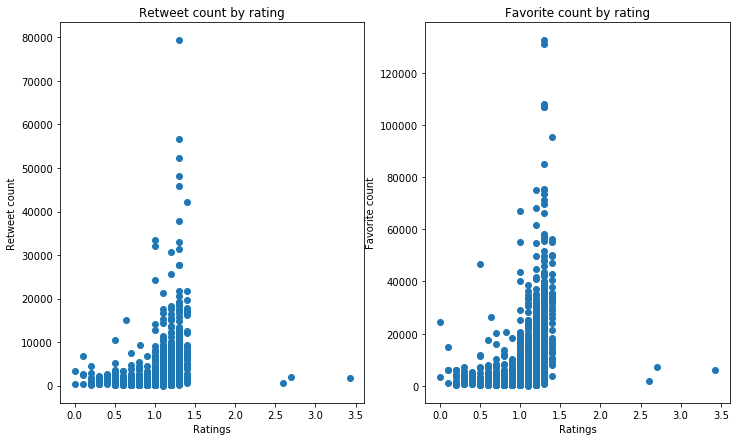

In [72]:
plt.subplots(figsize=(12, 7))

plt.subplot(121)
plt.scatter(archive.ratings, archive.retweet_count);
plt.title("Retweet count by rating")
plt.xlabel("Ratings")
plt.ylabel("Retweet count")

plt.subplot(122)
plt.scatter(archive.ratings, archive.favorite_count);
plt.title("Favorite count by rating")
plt.xlabel("Ratings")
plt.ylabel("Favorite count")

We can notice a positive correlation between each of these 2 variables with rating, whenever rating increases the favorite count and retweet count increase too.
***
***
<a id='fav_dog_type'> </a>

### 2. Favorite dog type

#### 1. By count

In [73]:
dogtypes_counts = archive.groupby('dogtype').tweet_id.count()
dogtypes_counts

dogtype
doggo              68
doggo, floofer      1
doggo, pupper       9
doggo, puppo        2
floofer             7
pupper            228
puppo              27
Name: tweet_id, dtype: int64

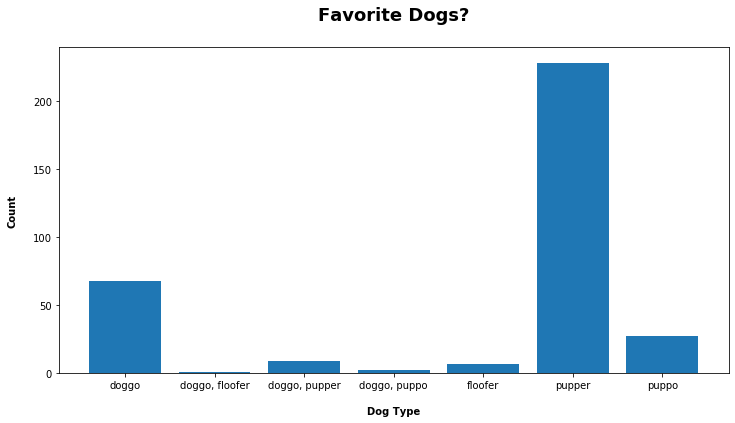

In [74]:
dogtype_labels = ['doggo','doggo, floofer', 'doggo, pupper', 'doggo, puppo', 'floofer', 'pupper', 'puppo']

plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4, 5, 6, 7], dogtypes_counts, tick_label=dogtype_labels)
plt.title('Favorite Dogs?\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('Count\n', weight='bold');

#### 2. By rating

In [75]:
dogtype_ratings = archive.groupby('dogtype').ratings.mean()
dogtype_ratings

dogtype
doggo             1.180882
doggo, floofer    1.100000
doggo, pupper     1.100000
doggo, puppo      1.300000
floofer           1.200000
pupper            1.074123
puppo             1.211111
Name: ratings, dtype: float64

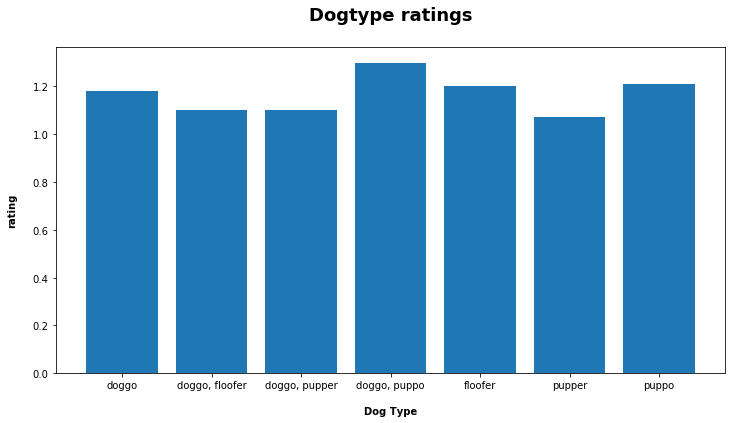

In [76]:
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4, 5, 6, 7], dogtype_ratings, tick_label=dogtype_labels)
plt.title('Dogtype ratings\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('rating\n', weight='bold');

#### 3. By retweet count

In [77]:
dogtype_retweet_count = archive.groupby('dogtype').retweet_count.mean()
dogtype_retweet_count

dogtype
doggo              6785.661765
doggo, floofer     3433.000000
doggo, pupper      4083.444444
doggo, puppo      11483.500000
floofer            4968.714286
pupper             2296.026316
puppo              6337.481481
Name: retweet_count, dtype: float64

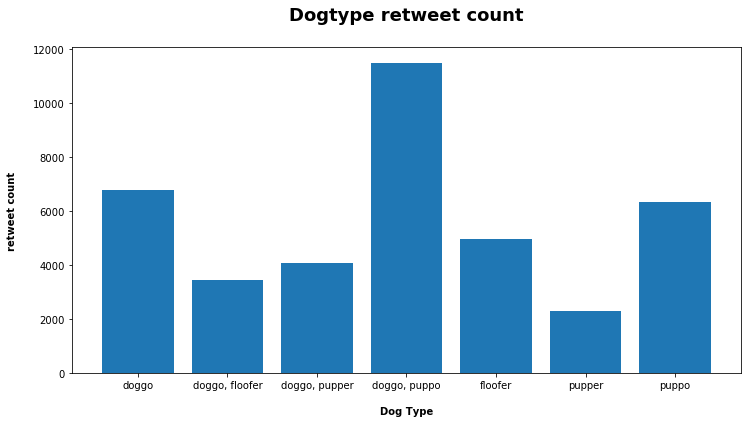

In [78]:
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4, 5, 6, 7], dogtype_retweet_count, tick_label=dogtype_labels)
plt.title('Dogtype retweet count\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('retweet count\n', weight='bold');

#### 4. By favorite count

In [79]:
dogtype_favorite_count = archive.groupby('dogtype').favorite_count.mean()
dogtype_favorite_count

dogtype
doggo             18358.161765
doggo, floofer    17169.000000
doggo, pupper     12533.111111
doggo, puppo      32074.000000
floofer           13206.000000
pupper             7030.192982
puppo             21957.962963
Name: favorite_count, dtype: float64

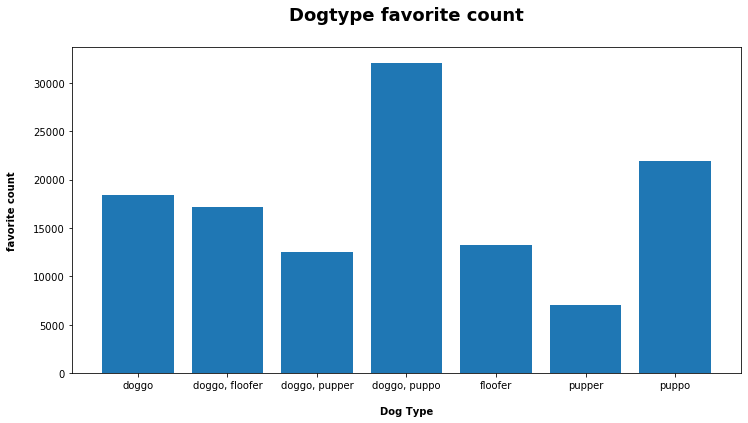

In [80]:
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4, 5, 6, 7], dogtype_favorite_count, tick_label=dogtype_labels)
plt.title('Dogtype favorite count\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('favorite count\n', weight='bold');

***
***
<a id='fav_dog_breed'> </a>
### 3. Favorite Dog breeds

In [81]:
predictions.head()

,tweet_id,jpg_url,img_num,prediction_order,pred,conf,isDog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


#### 1. By count

In [82]:
breeds = predictions.query("prediction_order == 1")[["tweet_id", "pred"]]
breeds

,tweet_id,pred
0,666020888022790149,Welsh_springer_spaniel
3,666029285002620928,redbone
6,666033412701032449,German_shepherd
9,666044226329800704,Rhodesian_ridgeback
12,666049248165822465,miniature_pinscher
15,666050758794694657,Bernese_mountain_dog
20,666055525042405380,chow
25,666058600524156928,miniature_poodle
28,666063827256086533,golden_retriever
31,666071193221509120,Gordon_setter


In [83]:
# Gets Top 5 breeds by count
top_breeds = breeds.pred.value_counts().head()
top_breeds

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
Name: pred, dtype: int64

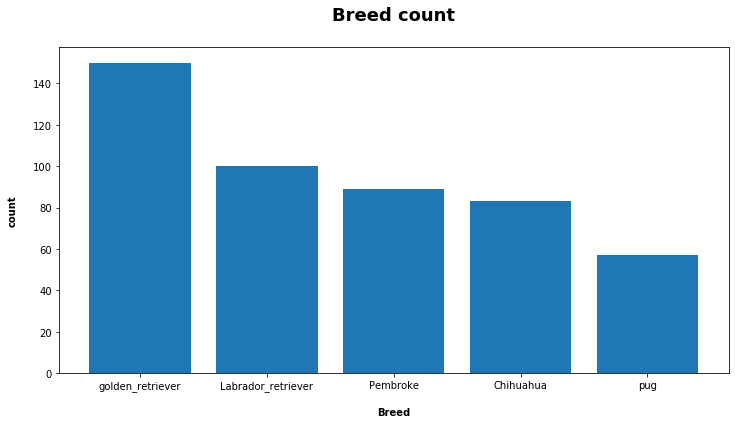

In [84]:
#####

plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4, 5], top_breeds, tick_label=list(top_breeds.keys()))
plt.title('Breed count\n', fontsize=18, weight='bold')
plt.xlabel('\nBreed', weight='bold')
plt.ylabel('count\n', weight='bold');




***
Creating a new dataframe by merging columns from archive and predictions, t get ratings, retweet_count and favorite_count of dog breeds

In [85]:
breed_metrics = pd.merge(breeds, archive, on="tweet_id")


Now, I can group by breed and calculate : ratings, retweet_count, favorite_count

In [86]:
def top_breed_by(df, metric, unwanted_breeds=[]):
    
    return df.query("pred not in @unwanted_breeds")\
            .groupby("pred")[metric].mean()\
            .sort_values(ascending=False).head()

In [87]:
# get list of unwanted breeds
masc = breed_metrics.pred.value_counts() < 10
unwanted_breeds = list((masc).index[masc])


In [88]:
top_breed_rating = top_breed_by(breed_metrics, "ratings", unwanted_breeds)

#### 2. By rating

In [89]:
breed_rating = top_breed_by(breed_metrics, "ratings", unwanted_breeds)
breed_rating

pred
kuvasz              1.206250
Eskimo_dog          1.177778
Samoyed             1.170000
golden_retriever    1.169401
chow                1.160976
Name: ratings, dtype: float64

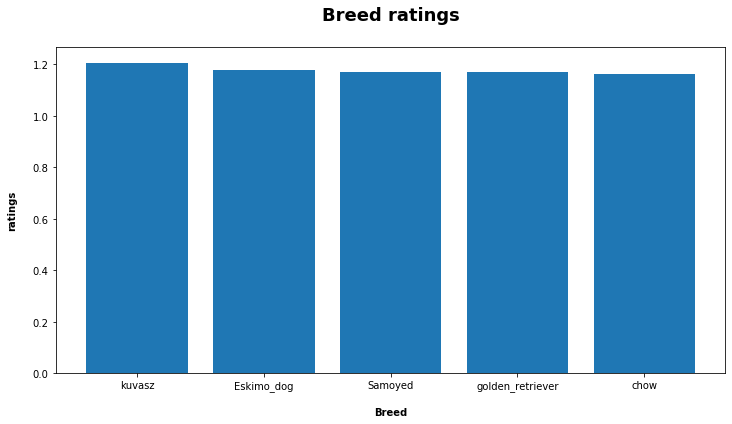

In [90]:
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4, 5], breed_rating, tick_label=breed_rating.index.to_list())
plt.title('Breed ratings\n', fontsize=18, weight='bold')
plt.xlabel('\nBreed', weight='bold')
plt.ylabel('ratings\n', weight='bold');

#### 3. By retweet count

In [91]:
breed_retweet = top_breed_by(breed_metrics, "retweet_count", unwanted_breeds)
breed_retweet

pred
Eskimo_dog        4768.888889
Great_Pyrenees    4732.285714
French_bulldog    4683.923077
Samoyed           4623.050000
Cardigan          4540.588235
Name: retweet_count, dtype: float64

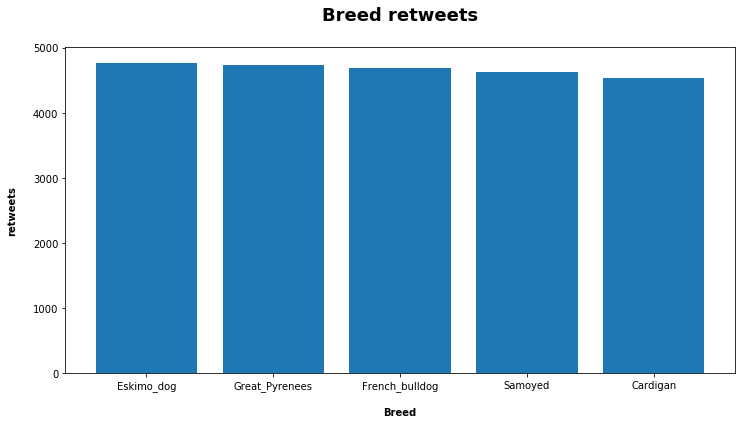

In [92]:
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4, 5], breed_retweet, tick_label=breed_retweet.index.to_list())
plt.title('Breed retweets\n', fontsize=18, weight='bold')
plt.xlabel('\nBreed', weight='bold')
plt.ylabel('retweets\n', weight='bold');

#### 4. By favorite count

In [93]:
breed_favorite = top_breed_by(breed_metrics, "favorite_count", unwanted_breeds)
breed_favorite

pred
French_bulldog      17913.000
Cardigan            15311.000
basset              13866.000
Samoyed             13574.775
Lakeland_terrier    12955.750
Name: favorite_count, dtype: float64

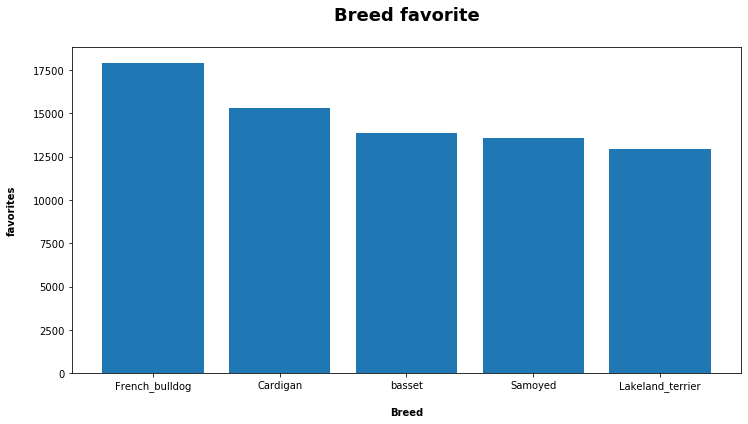

In [94]:
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4, 5], breed_favorite, tick_label=breed_favorite.index.to_list())
plt.title('Breed favorite\n', fontsize=18, weight='bold')
plt.xlabel('\nBreed', weight='bold')
plt.ylabel('favorites\n', weight='bold');

All these plots point to the same result, which is: 
The most favorited breed of dogs are the following:
 - Golden retriever
 - Labrador retriever
 - Pembroke
 - Chihuahua
 - Pug
 
which are the most mentionned in weRateDogs tweets. 

<a id='user_inter_time'> </a>
### 4. User interaction over time

In [95]:
archive_weekly = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))[['favorite_count', 'retweet_count']].mean()\
                    .reset_index().sort_values('timestamp')[:-1]

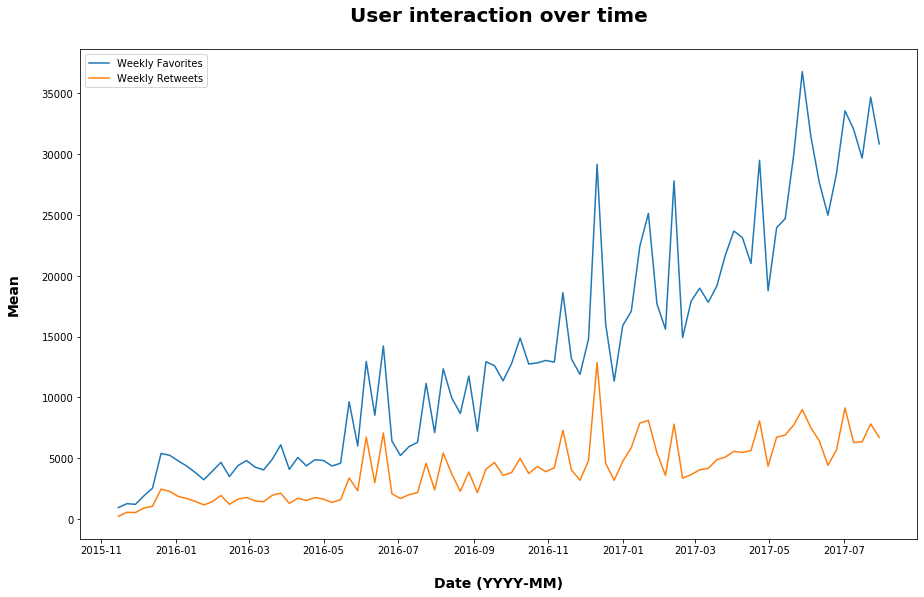

In [98]:
plt.subplots(figsize=(15, 9))
plt.plot(archive_weekly.timestamp, archive_weekly.favorite_count, label="Weekly Favorites");
plt.plot(archive_weekly.timestamp, archive_weekly.retweet_count, label="Weekly Retweets");
plt.title('User interaction over time\n', fontsize=20, weight='bold')
plt.xlabel('\nDate (YYYY-MM)', weight='bold', fontsize=14)
plt.ylabel('Mean\n', weight='bold', fontsize=14)
plt.legend();

We clearly see how the mean number of favorites by week increased from 1000 approximately in 2015-11 to over 30000 in 2017-07,
which is not the case when looking at the numbers of retweets which did not grow so much this period.

<a id='conclusion'> </a>
## Conclusion
In this project, I started with 4 questions and 3 sources of data and after gathering this data, assessing it and then cleaning it, I proceeded with the data analysis and visualizations which allowed me to find answers to the starting questions.